# Generating data from Hamilton's Markov Switching Model with Business Fluctuations

In [8]:
import pandas as pd
import numpy as np 
import random as rand 
import matplotlib.pyplot as plt 

### Paramterising model without a constant

In [9]:
P = 0.9008
Q = 0.7606
PHI1 = 0.0898
PHI2 = -0.0186
PHI3 = -0.1743
PHI4 = -0.0839
SIGMA = 0.7962
MU0 = -0.2132
MU1 = 1.1283

### Laying out the data schema

In [10]:
gnp_data = pd.DataFrame({'t':[0,1,2,3],'dy':[1.2, 1.1, 1.1, 1.1],'S':[1, 1, 1, 1],'mu':[MU1,MU1,MU1,MU1]})
gnp_data

,t,dy,S,mu
0,0,1.2,1,1.1283
1,1,1.1,1,1.1283
2,2,1.1,1,1.1283
3,3,1.1,1,1.1283


### Generating datapoints

In [11]:
for t in range(4, 100):
    # randomly switch regimes according to Markov transition probabilities

    # gathering relevant previous values (AR(4) requires lags 1-4)
    s_prev = gnp_data.loc[t-1]['S']

    dy_l1 = gnp_data.loc[t-1]['dy']
    mu_l1 = gnp_data.loc[t-1]['mu']

    dy_l2 = gnp_data.loc[t-2]['dy']
    mu_l2 = gnp_data.loc[t-2]['mu']

    dy_l3 = gnp_data.loc[t-3]['dy']
    mu_l3 = gnp_data.loc[t-3]['mu']

    dy_l4 = gnp_data.loc[t-4]['dy']
    mu_l4 = gnp_data.loc[t-4]['mu']

    # switching the regime (Eq 4.82: P[S_t=1|S_{t-1}=1]=p, P[S_t=0|S_{t-1}=0]=q)
    sample = rand.random()
    if s_prev:
        if sample <= P:
            s = 1
        else:
            s = 0
    else:
        if sample <= Q:
            s = 0
        else:
            s = 1

    # Eq 4.79: (dy_t - mu_S_t) = sum of phi_i * (dy_{t-i} - mu_{S_{t-i}}) + e_t
    mu = MU1 if s == 1 else MU0
    epsilon = rand.normalvariate(sigma=SIGMA)  # e_t ~ N(0, sigma^2)

    dy = mu + PHI1*(dy_l1-mu_l1) + PHI2*(dy_l2-mu_l2) + PHI3*(dy_l3-mu_l3) + PHI4*(dy_l4-mu_l4) + epsilon

    
    new_row = pd.DataFrame({'t':[t],'dy':[dy],'S':[s],'mu':[mu]})

    gnp_data = pd.concat([gnp_data, new_row], ignore_index=True)



gnp_data

,t,dy,S,mu
0,0,1.200000,1,1.1283
1,1,1.100000,1,1.1283
2,2,1.100000,1,1.1283
3,3,1.100000,1,1.1283
4,4,2.662336,1,1.1283
...,...,...,...,...
95,95,0.446353,1,1.1283
96,96,1.545710,1,1.1283
97,97,0.723390,1,1.1283
98,98,0.255207,1,1.1283


In [15]:
gnp_data.describe()

,t,dy,S,mu
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,1.038798,0.810000,0.873415
std,29.011492,0.933228,0.394277,0.528923
min,0.000000,-0.977249,0.000000,-0.213200
25%,24.750000,0.381338,1.000000,1.128300
50%,49.500000,1.068476,1.000000,1.128300
75%,74.250000,1.634257,1.000000,1.128300
max,99.000000,3.114160,1.000000,1.128300


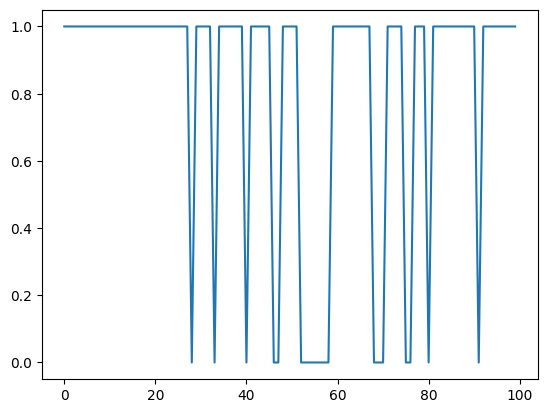

In [16]:
plt.plot(gnp_data['S'])

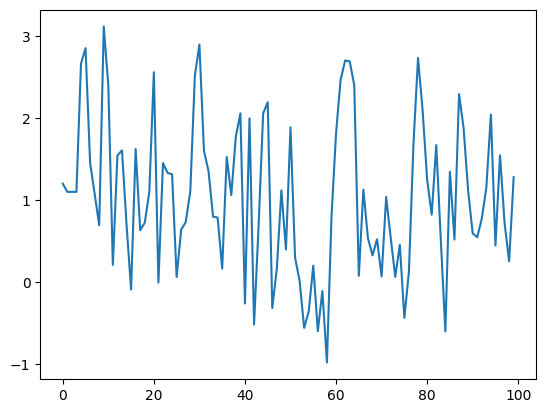

In [12]:
plt.plot(gnp_data['dy'])

In [13]:
gnp_data.to_csv(path_or_buf='./gnp_data_created.csv')